Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introduction to Vibration Theory


### Class 06 - The Fourier Transform

[1.   Introduction](#section_1)  
[2.   Formal definition](#section_2)  
[3.   Fourier transform of some basic functions](#section_3)  
[3.1. Constant function](#section_31)  
[3.2. Sine and cosine functions](#section_32)  
[4.   Transformation of derivatives](#section_4)  
[5.   Convolution and translation theorems](#section_5)  
[6.   The Fast Fourier Transform (FFT)](#section_6)  
[7.   Fourier series coefficients from FFT](#section_7)   
[8.   Assignment](#section8)

---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
_Porto Alegre, RS, Brazil_ 

In [1]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from MRPy import MRPy


## 1. Introduction <a name="section_1"></a> 

To understand the _Fourier transform_ we can firstly recall the _Fourier series_ concept, 
according which any _periodic function_ with period $T$ can be expressed as a sum of 
sines and cosines:

$$ f(t) =   a_0 + \sum_{k = 1}^\infty 
           {a_k \, \cos \omega_k t + b_k \, \sin \omega_k t}$$

with $f(t) = f(t + T)$ and $\omega_k = 2k\pi/T$, where:

\begin{align*}
 a_0 &= \frac{1}{T} \int_{-T/2}^{T/2} f(t) \; dt \\ \\
 a_k &= \frac{2}{T} \int_{-T/2}^{T/2} \cos \omega_k t \; f(t) \; dt \\ \\
 b_k &= \frac{2}{T} \int_{-T/2}^{T/2} \sin \omega_k t \; f(t) \; dt
\end{align*}

with $k = 1, 2, \dots\ \infty$.
Recalling that sine and cosine functions have zero mean implies that the 
series coefficient $a_0$ represents the mean value of function $f(t)$.
For example, it can be shown that the Fourier series expansion of a 
_zero mean square wave_ is:

$$ f(t) =   \frac{4}{\pi} \; \sum_{k = 0}^\infty 
            \frac{1}{k}   \;  \sin \omega_{2k+1} t $$

which can be verified with some few Python lines as follows.
Firstly we define a zero mean square wave with periodicity $T = 1$s:


In [2]:
T  =  1           # function periodicity in seconds
N  =  1000        # number of discretization points

t  =  np.linspace(0, T, N)
f1 =  np.zeros(N)

f1[:N//2] = 2.0   # first half period is filled
f1 =   f1 - 1.0   # f1 has zero mean and amplitude one


Then we reconstitutes this same function from Fourier series as given before, but limiting
the infinite summation to only ```Nk``` terms:

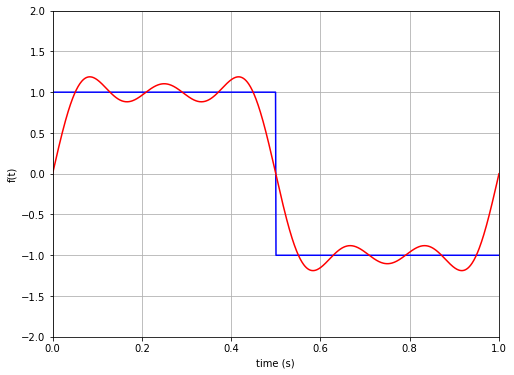

In [3]:
Nk =  5
f2 =  np.zeros(N)

for k in range(1, Nk+1, 2):
    f2  +=  np.sin(2*k*np.pi*t/T)/k

f2 *= 4/np.pi

plt.figure(1, figsize=(8, 6), clear=True)
plt.plot(t, f1, 'b', t, f2, 'r')

plt.xlim( 0, T);  plt.xlabel('time (s)') 
plt.ylim(-2, 2);  plt.ylabel('f(t)') 

plt.grid(True) 


The approximation accuracy can be explored by changing the value assigned to ```Nk``` in
the calculation above. 

It must be emphasized that the series coefficients $a_k$ and $b_k$ hold information about
how to _reconstitutes_ the original function $f(t)$, so they may be seen as _transformed_
functions of variable $\omega_k$ instead of variable $t$.
We will come back later showing how to numerically estimate the Fourier coefficients 
for any periodic function.

Once the Fourier series concept has been understood, the _Fourier transform_ is presented 
in the next section as a extension of the Fourier series concept for $T \rightarrow \infty$.


## 2. Formal definition  <a name="section_2"></a> 

The Fourier series expansion can also be expressed for any real or complex function $f(t)$
by replacing the sine and cosine functions in the previous definition with the 
Euler's formula:

$$ e^{i\omega_k t} = \cos \omega_k t + i \sin_k \omega t$$

what gives:

$$ f(t) =  \sum_{k = -\infty}^\infty {F_k \, e^{i \omega_k t}} $$

where:

$$ F_k = \frac{1}{T} \int_{-T/2}^{T/2} {e^{-i \omega_k t}} \; f(t) \; dt $$

with $ k = 0, \pm 1, \pm 2, \dots\, \pm \infty$.

Now the function periodicity is allowed to increase to infinite to yield the following limits:

\begin{align*}
                               T  &\rightarrow  \infty    \\
      \omega_k = k \Delta \omega  &\rightarrow  \omega    \\
          \Delta \omega = 2\pi/T  &\rightarrow   0
\end{align*}

and also the definition:

$$ \lim_{T \rightarrow \infty} \; \left( T \; F_k  \right)
 = \lim_{\Delta \omega \rightarrow 0} \; \left( \frac{2 \pi} {\Delta \omega} \; F_k \right)
 = F(\omega)$$

which replaced on the series expansion for $f(t)$ gives:

$$ f(t) = \lim_{\Delta \omega \rightarrow 0} \; 
          \left[ \frac{1}{2 \pi} \sum_{k = -\infty}^\infty  e^{i \omega_k t} 
          \left( \frac{2 \pi}{\Delta \omega} \; F_k  \right)
          \Delta \omega \right] $$

and hence:

$$ f(t) = \frac{1}{2\pi}\int_{-\infty}^{\infty} {e^{i\omega t}\; F(\omega) \; d\omega}
        = \mathscr{F}^{-1} \left\{ F(\omega) \right\} $$

with:

$$ F(\omega) = \int_{-\infty}^{\infty} e^{-i\omega t}\; f(t) \; dt 
             = \mathscr{F}\left\{ f(t) \right\} $$

which are the inverse and the direct _Fourier Transform_ definitions, respectively.
Observing that both integral bounds are infinite, the function $f(t)$ 
must fulfill some special conditions such that the integral convergence
can be ensured.
The most important condition is that the integral of $\left| f(t) \right|$ 
over the complete domain exists:

$$ \exists \int_{-\infty}^{\infty} \left| f(\xi) \right| \; d\xi \in {\mathbb C}$$

although in some special cases the transformation is possible even if this 
condition is not fulfilled.

The transform of a given function and its inverse constitutes a so-called
_transform pair_, usually represented as:

$$ f(t) \Longleftrightarrow F(\omega) $$

While the use of Laplace transforms mostly rely upon _lookup tables_ or CAS 
(_Computer Algebra Systems_), the Fourier transform, both direct and inverse, 
is usually evaluated by means of numerical techniques. 
Nevertheless, some fundamental functions and theorems must receive special 
attention as follows.


## 3. Fourier transform of some basic functions <a name="section_3"></a> 

### 3.1. Constant function <a name="section_31"></a> 

The constant function, $f(t) = c$, does not fulfill the condition for the transform existence
(its integral over the whole domain is infinite), but by assuming that the inverse
transform exists:

$$ c  = \frac{1}{2 \pi} \int_{-\infty}^{\infty} e^{i\omega t}\; F(\omega) \; dt $$

it can be observed that the only function satifying the integral is the Dirac's Delta:

$$ F(\omega) = 2\pi c \; \delta(\omega) $$

We will numerically demonstrate this result later on.


### 3.2. Sine and cosine functions <a name="section_32"></a> 

The trigonometric functions $\sin(\omega_0 t)$ and $\cos(\omega_0 t)$ also do not fulfill
the condition for transform existence but, in the same way as for the constant function,
a meaningful transform can be found. 
Observe that a given $\omega_0$ is being used instead of the independent variable $\omega$.

Let us assume that the inverse transform of the Euler's formula exists:

$$ f(t) = e^{i\omega_0 t} = \frac{1}{2 \pi} 
          \int_{-\infty}^{\infty} e^{i\omega t}\; F(\omega) \; dt $$

then again the only function satisfying this integral is the Dirac's Delta at $\omega_0$.

$$ F(\omega) = 2 \pi \; \delta (\omega - \omega_0)$$

By going back from Euler's formula it can be easily demonstrated that for the cosine function
it gives:

$$ \mathscr{F} \left\{ \cos (\omega_0 t) \right\} = 
   \pi \left[ \delta(\omega + \omega_0) + \delta(\omega - \omega_0) \right]$$

and similarly for the sine function:

$$ \mathscr{F} \left\{ \sin (\omega_ t) \right\} = 
   i\pi \left[ \delta(\omega + \omega_0) - \delta(\omega - \omega_0) \right]$$

These two transforms are depicted below.

<img src="images/Fourier_sine_cosine.png" alt="Heaviside" width="720px"/>

It can be seen that the cosine transform converges to the constant function transform
as the frequency $\omega_0$ goes to zero.
These results will also be demonstrated after we introduce the numerical approach
to the Fourier transform.


## 4. Transformation of derivatives <a name="section_4"></a> 

The transformation of derivatives is essential for using Fourier transform 
for solving differential equations.
The transform of a derivative is expressed as:

$$ \mathscr{F} \left\{ \dot{f}(t) \right\} = 
   \int_{-\infty}^{\infty} e^{-i\omega t} \; \dot{f}(t) \; dt $$

This can be solved through integration by parts by defining:

\begin{array}{ll}
   u  &= e^{-i\omega t}              \hspace{2cm}  &dv = \dot{f}(t) \; dt \\
   du &= -i\omega e^{-i\omega t} dt                &v  = f(t)         
\end{array}

and replacing in:

$$ \int u \; dv = uv - \int v \; du$$

Assuming that the function $f(t)$ may be zero at the far ends of the integration domain
implies that the product $uv$ may be considered to vanish and hence:

$$ \int_{-/infty}^{\infty} e^{-i\omega t} \; \dot{f}(t) \; dt = 
   0 + i\omega \int_{-\infty}^{\infty} e^{-i\omega t} \; f(t) \; dt$$

and hence:

$$ \mathscr{F} \left\{ \dot{f}(t) \right\} = i\omega F(\omega)$$

For solving the dynamic equilibrium equation of linear systems, the second time
derivative of $f(t)$ will also be necessary.
Applying again the derivation rule results:

$$ \mathscr{F} \left\{ \ddot{f}(t) \right\} = -\omega^2 F(\omega) $$

Time derivatives of higher order can be calculated but will not be necessary in the
present context.


## 5. The convolution and translation theorems <a name="section_5"></a> 

The convolution and translation theorems previously presented for Laplace transform
also apply to the Fourier transform.
The convolution reads:

$$ \mathscr{F} \left\{ f(t) * g(t) \right\} = F(\omega) \; G(\omega) $$

while the translation in frequency and time domain reads:

$$ \mathscr{F} \left\{ e^{\omega_0 t} f(t) \right\} =  F(\omega - \omega_0) $$

$$ \mathscr{F} \left\{ f(t - \tau) \right\} =  e^{-\omega \tau} \; F(\omega) $$

These theorems will be of little use in this course.


## 6. The Fast Fourier Transform (FFT) <a name="section_6"></a> 

While there is no explicit form for the inverse Laplace transform, it was shown above that
the same does not happen for the Fourier transform.
This means that it can be numerically evaluated in both ways by means of a time and 
frequency domains discretization:

\begin{align*}
\omega_k &= k \left( \frac{2\pi}{T} \right), \;\;\; k = 0, 1, 2, \dots, N-1  \\ \\
     t_i &= i \left( \frac{T}{N} \right),    \;\;\; i = 0, 1, 2, \dots, N-1  
\end{align*}

where $N$ is the length of a time series $f_i = f(t_i)$ with total duration $T$.
The numerical calculation of the direct and inverse transforms are then:

\begin{align*}
F_k &=             \sum_{i=0}^{N-1} {f_i \; \exp\left(-\omega_k t_i \right)} \\ \\
f_i &= \frac{1}{N} \sum_{k=0}^{N-1} {F_k \; \exp\left( \omega_k t_i \right)}
\end{align*}

Observe that all the computation above requires $N^2$ evaluations of the 
trigonometric function $\exp\left(2\pi k i \right)$. 
Recognizing that the multiple permutations of indices $k$ and $i$ could be 
accounted to save computational time inspired the famous FFT algorithm by
[Cooley and Tukey](https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm),
which may reduce the number of exponential function evaluations up to $2N$.
This algorithm is now implemented in many digital signal processing programs
and is also available in the ```numpy``` and ```scipy``` modules in Python.

For example, let us calculate the FFT of a constant function, as presented earlier:


In [8]:
N  = 8                    # length of time series
f  = np.ones(N)           # assigning constant value 1
F  = np.fft.fft(f)        # calling FFT numpy function

print(f)
print(F.real)
print(F.imag)


[1. 1. 1. 1. 1. 1. 1. 1.]
[8. 0. 0. 0. 0. 0. 0. 0.]
[ 0. -0.  0.  0.  0. -0. -0.  0.]


what shows that the result is a real impulse function (discrete Dirac's Delta) at the origin.
Now let us look at the cosine function:

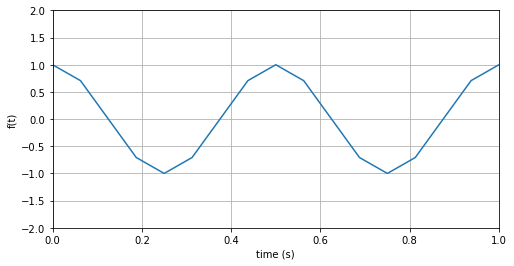

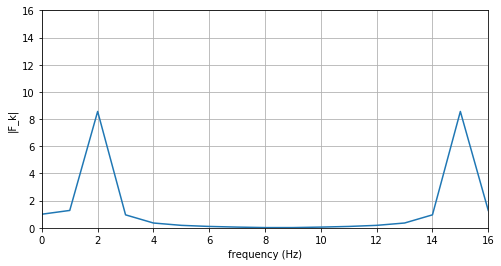

In [40]:
N  = 16                  # length of time series
T  = 1.                  # series total duration
f0 = 2.                  # sine/cosine frequency (in Hertz)

k  = np.arange(0, N+1)   # required for f_k calculation
ti = k*T/N               # discrete time domain
fk = k/T                 # discrete frequency domain

si = np.cos(2*np.pi*f0*ti)
Sk = np.fft.fft(si)

plt.figure(2, figsize=(8, 4), clear=True)
plt.plot(ti, si)
plt.xlim( 0, T);  plt.xlabel('time (s)') 
plt.ylim(-2, 2);  plt.ylabel('f(t)') 
plt.grid(True) 

plt.figure(3, figsize=(8, 4), clear=True)
plt.plot(fk, np.abs(Sk))
plt.xlim( 0, N/T);  plt.xlabel('frequency (Hz)')
plt.ylim( 0, N  );  plt.ylabel('|F_k|') 
plt.grid(True) 


There are some few important issues to understand the numerical result above:

1. To get maximum algorithm efficiency, the length $N$ must be a power of 2.
2. The value of $F_k$ for $k = 0$ is zero if $f(t)$ has zero mean.
3. If $f(t)$ is real, the second half of $F_k$ is the complex conjugate of the first half.
4. 



## 7. Fourier series coefficients from FFT <a name="section_7"></a> 

Let us assume that...


## 8. Assignment <a name="section_8"></a> 

Let us assume that...
